# Modelling of Physical Systems - lab 02 - Rafał Łukosz

In [4]:
import pint
from pint import Unit
from scipy import constants
import numpy as np
from matplotlib import pyplot as plt
from open_atmos_jupyter_utils import show_plot

si = pint.UnitRegistry()

## Calculate concentration distribution

## Mathematical Model

The function models the concentration $ c(x, t) $ of a substance spreading in space and time according to the advection-diffusion equation:

$$ \frac{\partial c}{\partial t} + U\frac{\partial c}{\partial x} = D\frac{\partial^2 c}{\partial x^2}$$

where:
- $ M $: total substance $kg$
- $ A $: Volumetric flow $m^3 / s$
- $ D $: diffusion coefficient $m^2/s$
- $ U $: velocity $m/s$

## Context
This model is commonly applied in fluid dynamics, environmental engineering, and atmospheric sciences to describe pollutant dispersion, heat conduction, and other transport phenomena.

## Type of Solution
This equation describes the combined effects of advection (transport due to bulk motion) and diffusion (spreading due to random molecular motion) on the concentration of the substance over time.
Over time, the peak shifts in the direction of advection (due to $U $), while the profile broadens due to diffusion (controlled by $D $).


In [6]:
def c(
    x: np.ndarray,
    t: np.ndarray,
    M: float = 1.0 * si.kg,
    A: float = 1.0 * si.m**3 / si.s,
    D: float = 1.0 * si.m**2 / si.s,
    U: float = 1.0 * si.m / si.s,
) -> np.ndarray:
    """
    Function to calculate the concentration of a substance in a medium over time and space.
    
    Args:
        x: Position array
        t: Time array
        M: Total substance amount
        A: Velocity flux
        D: Diffusion coefficient 
        U: Velocity
    """
    X, T = np.meshgrid(x.magnitude, t.magnitude)
    X = X * x.units
    T = T * t.units

    return (
        M
        / (A * 2 * np.sqrt(np.pi * D))
        * X
        / T**1.5
        * np.exp(-((U * T - X) ** 2) / (4 * D * T))
    )

## Plots

In [7]:
si.setup_matplotlib()

In [43]:
x = np.linspace(0, 10, 200) * si.m
t = np.linspace(0.1, 100, 100) * si.s

concentration = c(
    x, t, M=1.0 * si.kg, A=1.0 * si.m**3 / si.s, D=0.002 * si.m**2 / si.s, U=0.05 * si.m / si.s
)

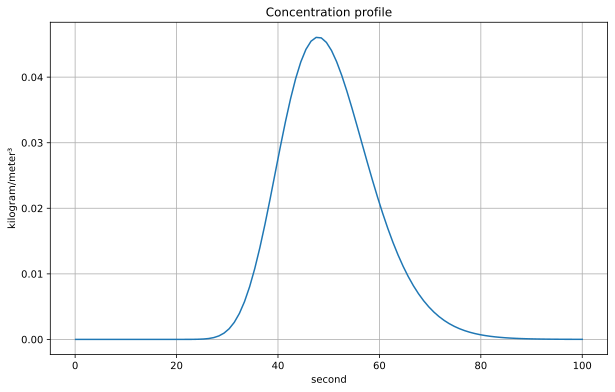

In [44]:
fig = plt.figure(figsize=(10, 6))
plt.plot(t, concentration[:, 50])
plt.title("Concentration profile")
plt.grid()
show_plot(fig=fig)